<a href="https://colab.research.google.com/github/Eduardo-Coyto/CICADA/blob/Visualizaci%C3%B3n/IntroVisualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Módulo 1: Intro, Visualización



### Python

Python es un lenguaje de programación multiparadigma de tipado dinámico de alto nivel. A menudo se dice que el código de Python es casi como un pseudocódigo, ya que le permite expresar ideas muy poderosas en muy pocas líneas de código y es muy legible. 

Para profundizar en conceptos de Python, o para consultar como referencia:

* [CS231n Python Tutorial With Google Colab](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=cYb0pjh1L9eb)

* [Python Cheatsheet](https://www.pythoncheatsheet.org/)

* [Intro a Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html)

#### Características
- Python es un lenguaje orientado a objetos. 
- Python tiene un vasto ecosistema de bibliotecas, incluyendo muchos para ciencia de datos, que permite extender el lenguaje a nuevos tipos de datos y funcionalidades.


#### Lenguaje Interpretado
- Python es un lenguaje interpretado, a diferencia de Java y C que son lenguajes compilados.
- Esto significa que podemos escribir código en el interprete y será ejecutado inmediatamente, lo que nos permite trabajar "paso a paso".

#### Python y Jupyter (Colab)
- Los notebooks de Jupyter (o Colab) nos permiten intercambiar texto y código en diferentes bloques o celdas. Los comandos de python pueden ser escritos y ejecutados en cada celda simplemente presionando play.

- Las celdas de código pueden ser ejecutadas de a una o todas juntas, pero el orden importa, y la "memoria" del interprete respetará el orden de ejecución y no necesariamente el orden vertical del notebook.

- Si el código ejecutado en una celda devuelve un valor y no se asigna a una variable, la salida será visible a continuación de la celda. 

Como ejemplo, en la celda de código a continuación hay una implementación del clásico algoritmo de ordenación rápida en Python. Primero se define una función y luego se imprime el resultado de aplicar la función a una lista de números.

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


El interprete tiene memoria sobre la función declarada antes, y si la celda fue ejecutada puedo reutilizar esa función.

In [ ]:
quicksort([30,1,1,130,1,92,-109])

[-109, 1, 1, 1, 30, 92, 130]

## Visualización

Para lo que sigue usaremos datos externos, y algunas bibliotecas para extender las funcionalidades de python.

### Descarga de datos

Hay varias formas de descargar archivos publicamente disponibles de internet, en este caso descargamos dos archivos desde Google Drive y Github que quedarán disponibles en Colab mientras dure la sesión. Para explorar los archivos presentes se puede hacer click a la izquierda en el ícono de la carpeta.

In [ ]:
%%capture
!gdown --id 1JFe67qwopH7KQ7ThzXmgLhy6syAFB27h
!gdown --id 17ojr3-h2mKlrdwWNxc3bqq4E82OgLiAX
!wget -O titanic.csv https://raw.githubusercontent.com/pln-fing-udelar/curso_aa/master/data/titanic.csv

### Bibliotecas adicionales

Estas bibliotecas ya se encuentran disponibles en el ambiente Colab, simplemente hay que importarlas.

In [ ]:
# Importamos pandas, la próxima clase veremos a fondo sus funcionalidades.
import pandas as pd
# Importamos numpy, la biblioteca cientifica por excelencia.
import numpy as np
# Matplotlib, una de las tantas biblioteca para generar gráficos.
import matplotlib.pyplot as plt
# Seteamos el tamaño de los gráficos que hagamos de ahora en más.
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 6,6
# Seaborn, otra biblioteca para generar gráficos.
import seaborn as sns

Usaremos varias funcionalidades de pandas que serán explicadas en el próximo práctico

### Datasaurus

Vamos a cargar los datos desde el archivo descargado antes, es un archivo de datos tabulares, pandas nos ayuda a menejar este tipo de datos.

In [ ]:
# crear un DataFrame a partir de un archivo tsv, con separador '\t' y encabezado en la primer fila.
# guardar en variable df
df = pd.read_csv("DatasaurusDozen.tsv", sep='\t', header=0)
# mostrar df
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


El dataset que cargamos son en realidad puntos (x,y) pertenecientes a varios conjuntos de datos cuyo nombre está en la columna "dataset"

In [ ]:
# imprimir la lista de valores únicos en la columna 'dataset'
print(df["dataset"].unique())

['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']


Como podemos ver en la siguiente tabla, los puntos (x,y) de cada conjunto de datos tienen estádisticas muy similares:

In [ ]:
# agrupar filas por cada valor unico de la columna 'dataset' y mostrar estádisticas
df_stats = df.groupby('dataset').describe()
df_stats

x                                                         \
            count       mean        std        min        25%        50%   
dataset                                                                    
away        142.0  54.266100  16.769825  15.560750  39.724115  53.340296   
bullseye    142.0  54.268730  16.769239  19.288205  41.627968  53.842088   
circle      142.0  54.267320  16.760013  21.863581  43.379116  54.023213   
dino        142.0  54.263273  16.765142  22.307700  44.102600  53.333300   
dots        142.0  54.260303  16.767735  25.443526  50.359707  50.976768   
h_lines     142.0  54.261442  16.765898  22.003709  42.293828  53.069678   
high_lines  142.0  54.268805  16.766704  17.893499  41.535981  54.168689   
slant_down  142.0  54.267849  16.766759  18.109472  42.890931  53.135159   
slant_up    142.0  54.265882  16.768853  20.209778  42.810866  54.261345   
star        142.0  54.267341  16.768959  27.024603  41.034210  56.534732   
v_lines     142.0  54.269927  16.769959  30.449654  49.964506  50.362890   
wide_lines  142.0  54.266916  16.770000  27.439632  35.522449  64.550226   
x_shape     142.0  54.260150  16.769958  31.106867  40.091656  47.136458   

                                      y                                   \
                  75%        max  count       mean        std        min   
dataset                                                                    
away        69.146597  91.639961  142.0  47.834721  26.939743   0.015119   
bullseye    64.798900  91.735539  142.0  47.830823  26.935727   9.691547   
circle      64.972672  85.664761  142.0  47.837717  26.930036  16.326546   
dino        64.743600  98.205100  142.0  47.832253  26.935403   2.948700   
dots        75.197363  77.954435  142.0  47.839829  26.930192  15.771892   
h_lines     66.768274  98.288123  142.0  47.830252  26.939876  10.463915   
high_lines  63.952667  96.080519  142.0  47.835450  26.939998  14.913962   
slant_down  64.469989  95.593416  142.0  47.835896  26.936105   0.303872   
slant_up    64.488010  95.260528  142.0  47.831496  26.938608   5.645777   
star        68.711493  86.435897  142.0  47.839545  26.930275  14.365590   
v_lines     69.504068  89.504851  142.0  47.836988  26.937684   2.734760   
wide_lines  67.453672  77.915874  142.0  47.831602  26.937902   0.217006   
x_shape     71.856923  85.446186  142.0  47.839717  26.930002   4.577661   

                                                        
                  25%        50%        75%        max  
dataset                                                 
away        24.625892  47.535269  71.803148  97.475771  
bullseye    26.244735  47.382937  72.532852  85.876229  
circle      18.349610  51.025022  77.782382  85.578134  
dino        25.288450  46.025600  68.525675  99.487200  
dots        17.107141  51.299291  82.881589  94.249328  
h_lines     30.479911  50.473527  70.349471  90.458936  
high_lines  22.920843  32.499203  75.940022  87.152208  
slant_down  27.840858  46.401314  68.439430  99.644179  
slant_up    24.756248  45.292238  70.855844  99.579591  
star        20.374135  50.110554  63.548584  92.214989  
v_lines     22.752884  47.113616  65.845391  99.694680  
wide_lines  24.346941  46.279331  67.568127  99.283764  
x_shape     23.470809  39.876211  73.609634  97.837615

Vamos a usar una de las bilbiotecas importadas: matplotlib para ver como se comparan los promedios de las coordenadas. Primero extraemos la lista de datasets, la lista de promedios para X, y la lista de promedios para Y:

In [ ]:
labels = list(df_stats.index)
print(f"Labels: {labels}")
x_means = list(df_stats['x']['mean'].values)
print(f"Promedios para coord X: {x_means}")
y_means = list(df_stats['y']['mean'].values)
print(f"Promedios para coord X: {y_means}")

Labels: ['away', 'bullseye', 'circle', 'dino', 'dots', 'h_lines', 'high_lines', 'slant_down', 'slant_up', 'star', 'v_lines', 'wide_lines', 'x_shape']
Promedios para coord X: [54.266099784204926, 54.268730022378875, 54.267319706173936, 54.26327323943662, 54.26030345121761, 54.261441783514094, 54.26880527974154, 54.2678488233662, 54.26588178560211, 54.26734110449506, 54.26992723102747, 54.266916301257034, 54.26015033403803]
Promedios para coord X: [47.83472062488412, 47.830823155217814, 47.83771726721831, 47.832252816901416, 47.83982920875564, 47.830251913635216, 47.83545020393662, 47.835896330588206, 47.83149565202444, 47.839545225097886, 47.83698798816881, 47.831601988006156, 47.839717279160425]


Matplotlib puede ser algo tedioso de usar para graficar pero es muy versatil y permite configurar todos los aspectos de las figuras.

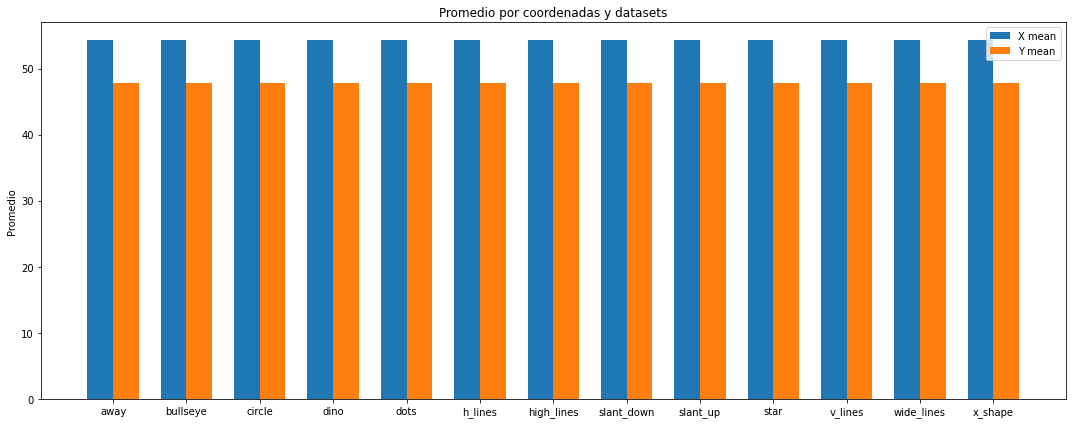

In [ ]:
x = np.arange(len(labels))  # los puntos para el eje de las x
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(15,6)) # creo la figura seteando el tamaño deseado

rects1 = ax.bar(x - width/2, x_means, width, label='X mean') # dibujo las barras de X
rects2 = ax.bar(x + width/2, y_means, width, label='Y mean') # las de Y

ax.set_ylabel('Promedio') # Etiqueta para eje de las Y
ax.set_title('Promedio por coordenadas y datasets') # titulo de la figura

ax.set_xticks(x) # posiciones de las X
ax.set_xticklabels(labels) # Etiqueta para el eje de las X
ax.legend() # muestro leyenda


fig.tight_layout()
plt.show() # muestro la figura

Pandas incorpora funciones que facilitan la creación de graficos, por detrás también usa matplotlib y acepta muchas, aunque no todas, de sus opciones.

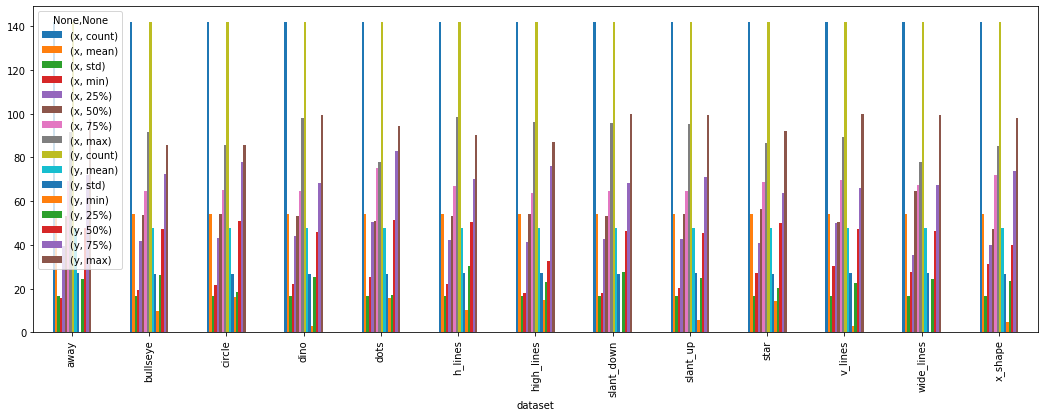

In [ ]:
df_stats.plot( kind='bar', figsize=(18,6))

La simulitud anterior llevaría a pensar que los conjuntos de puntos en sí son similares, sin embargo...

dataset
away          AxesSubplot(0.125,0.125;0.775x0.755)
bullseye      AxesSubplot(0.125,0.125;0.775x0.755)
circle        AxesSubplot(0.125,0.125;0.775x0.755)
dino          AxesSubplot(0.125,0.125;0.775x0.755)
dots          AxesSubplot(0.125,0.125;0.775x0.755)
h_lines       AxesSubplot(0.125,0.125;0.775x0.755)
high_lines    AxesSubplot(0.125,0.125;0.775x0.755)
slant_down    AxesSubplot(0.125,0.125;0.775x0.755)
slant_up      AxesSubplot(0.125,0.125;0.775x0.755)
star          AxesSubplot(0.125,0.125;0.775x0.755)
v_lines       AxesSubplot(0.125,0.125;0.775x0.755)
wide_lines    AxesSubplot(0.125,0.125;0.775x0.755)
x_shape       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

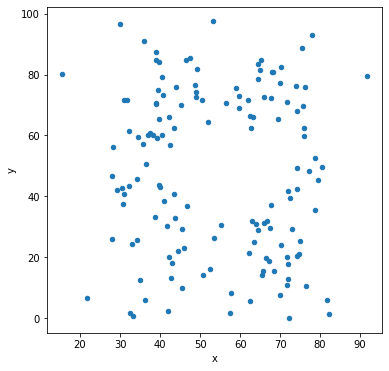

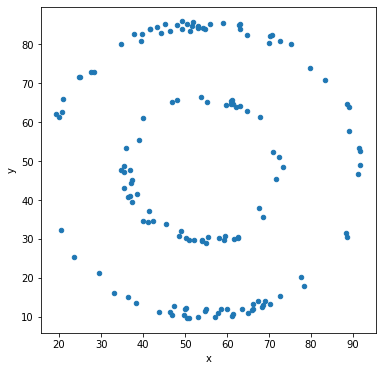

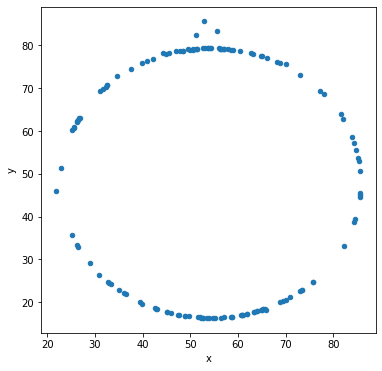

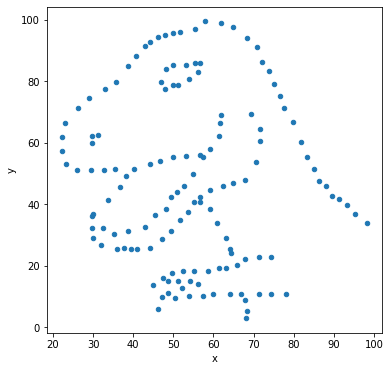

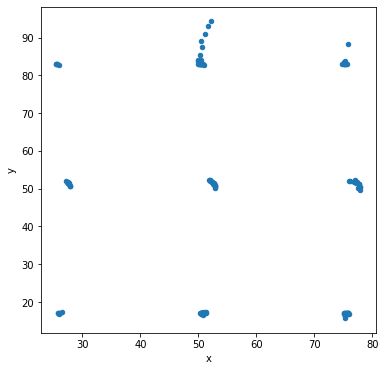

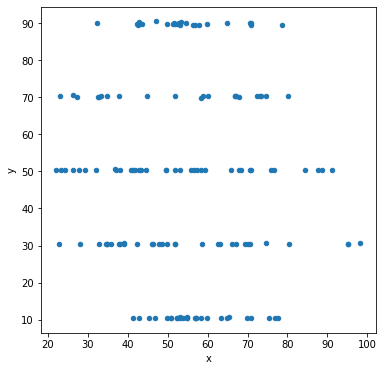

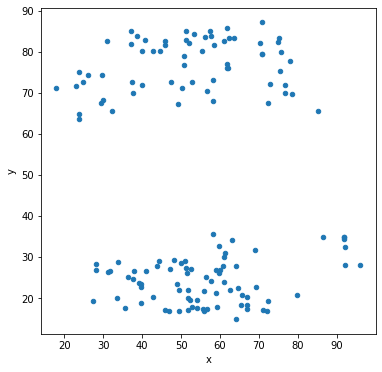

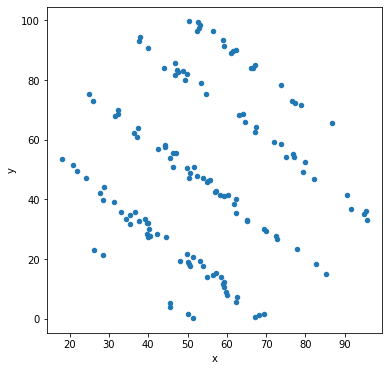

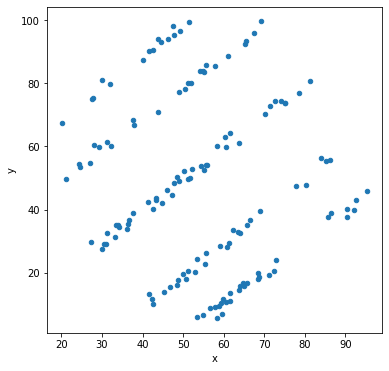

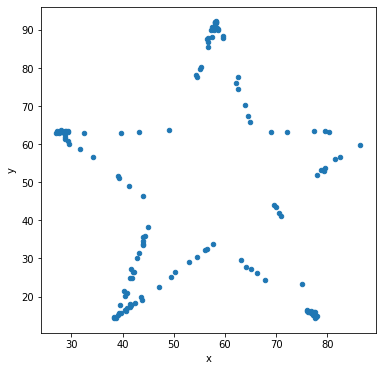

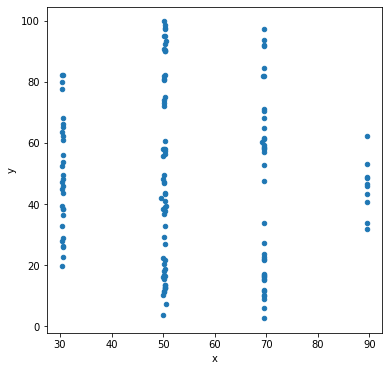

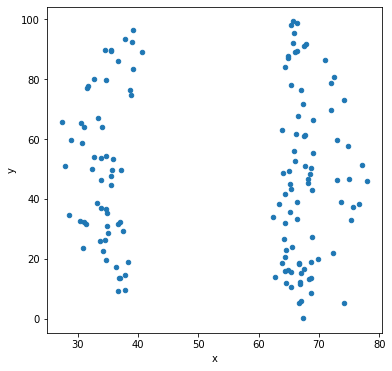

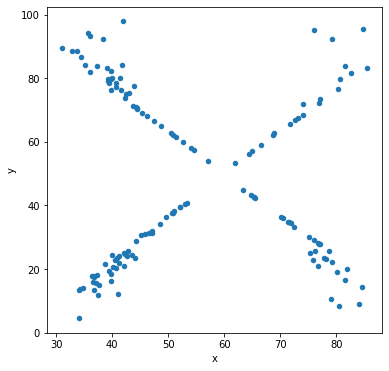

In [ ]:
# agrupar filas por cada valor unico de la columna 'dataset' y graficar con 'scatter' las columnas x e y.
df.groupby('dataset').plot('x','y',kind='scatter')

**Ejercicio:**


1.   Repetir los gráficos anteriores, usando matplotlib
2.   Graficar los histogramas de dos de los conjuntos de datos (por ejemplo, *dino* y *star*)







In [ ]:
# Espacio de código para hacer el ejercicio

### Titanic

Este conjunto de datos contiene información real sobre los pasajeros del Titanic




In [ ]:
# creo un DataFrame a partir de un csv, guardo en df
df = pd.read_csv('titanic.csv')
# muestro df
df

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


A continuación se muestra el histograma de las edades.

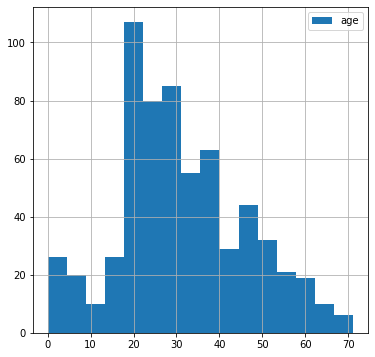

In [ ]:
# seleccionar la columna edad y mostrar un histograma de 16 bins.
df['age'].hist(bins=16, legend=True)

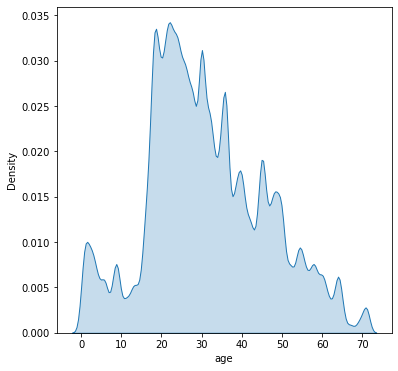

In [ ]:

sns.kdeplot(x=df.age, fill=True, bw_adjust=0.2)

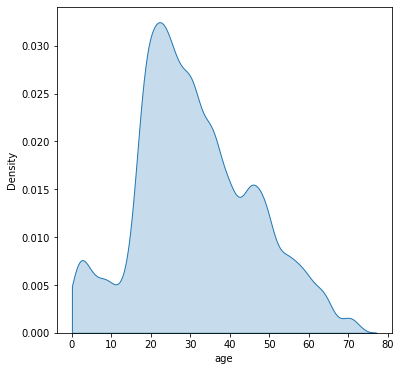

In [ ]:

sns.kdeplot(x=df.age,fill=True,bw_adjust=0.5,clip=(0,100))


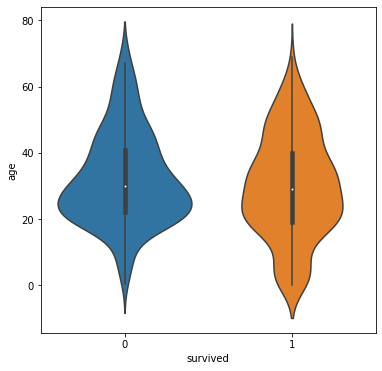

In [ ]:
sns.violinplot(x="survived", y="age", data=df)

In [ ]:
df = pd.read_csv('https://www.fing.edu.uy/~mfiori/life-expectancy.csv')
df

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


**Ejercicio:**


1.   Intentar aplicar algunas de las visualizaciones vistas en clase a este dataset.
